In [1]:
!pip3 install wandb
import wandb

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


/Users/swayam/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
wandb.login(key='fac5cd7f576f5d6d2591b0e77385c09a7922b210')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/Users/swayam/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
wandb: Currently logged in as: swayamagrawal1004. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/swayam/.netrc


True

In [3]:
wandb.init(
    # set the wandb project where this run will be logged
    project="SMAI_ASSIGNMENT3",
    
    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

In [4]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Dataset Analysis

DESCRIPTION:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.00

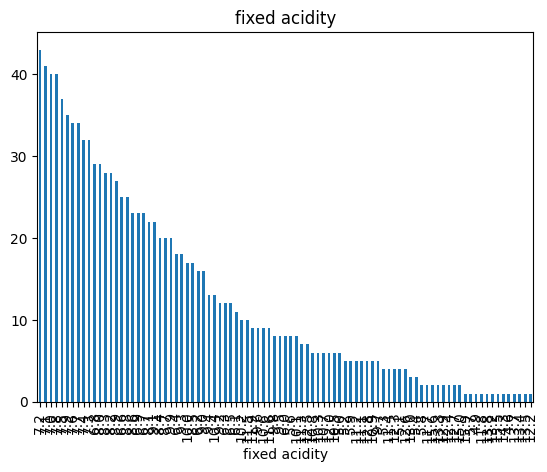

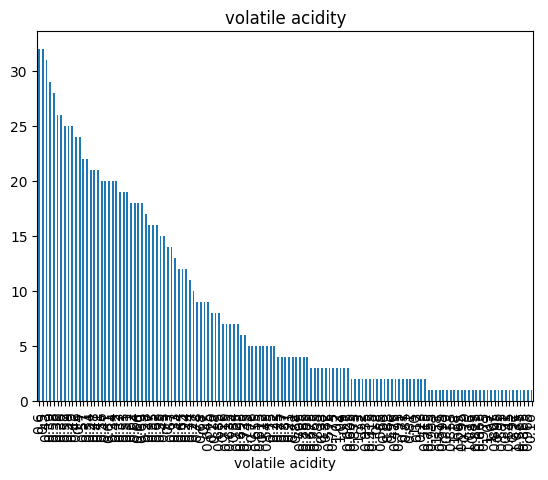

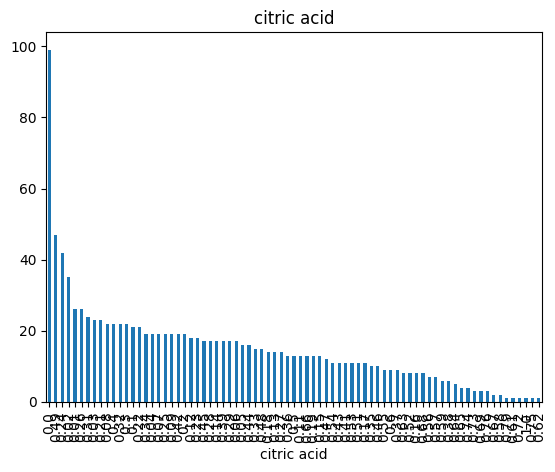

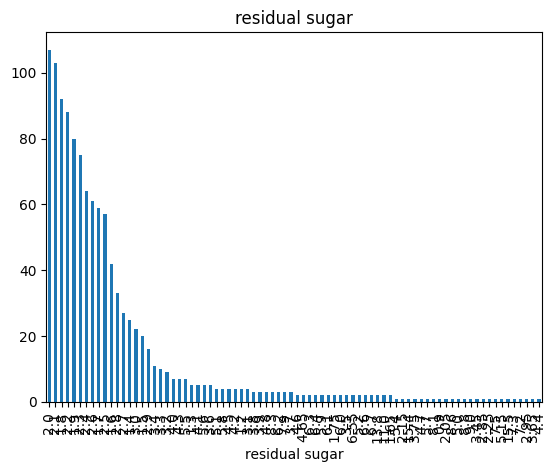

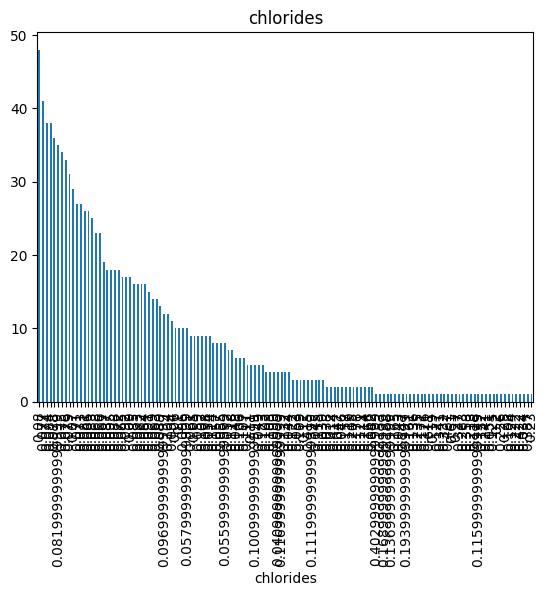

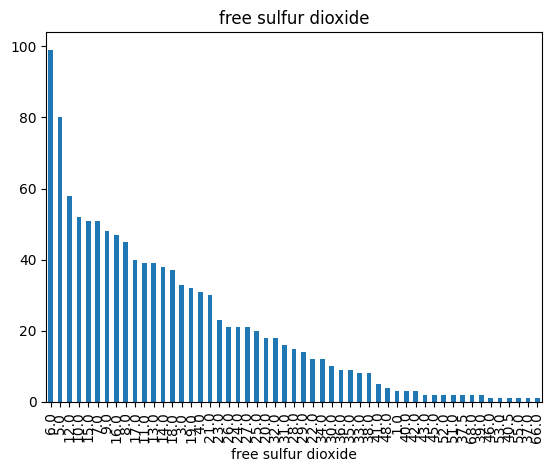

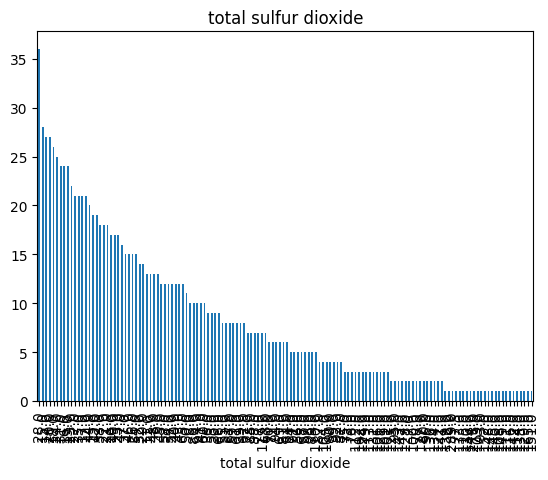

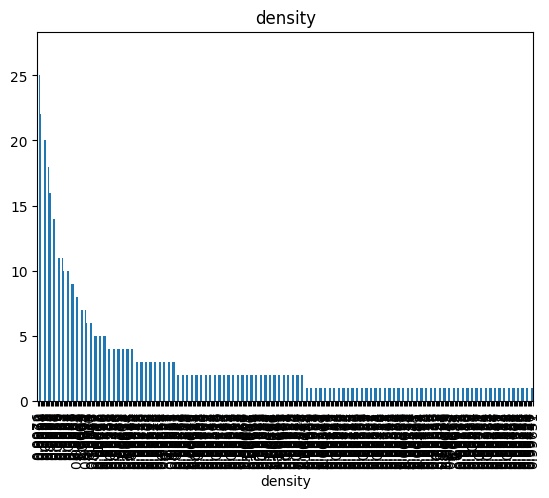

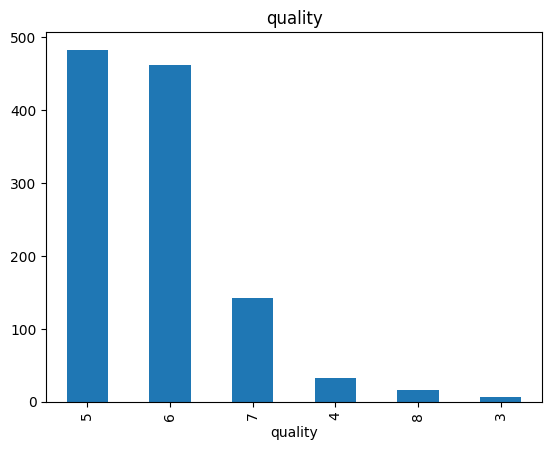

In [6]:
wine_dataset = pd.read_csv("WineQT.csv")
wine_desc = wine_dataset.describe()
print("DESCRIPTION:")
print(wine_desc)
print(wine_dataset.shape)
labels = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'quality']

for label_column in labels:
    plt.figure()
    wine_dataset[label_column].value_counts().plot(kind='bar', title=label_column)

plt.show()



# Dataset preprocessing

In [7]:
import copy
y = wine_dataset.quality
X = wine_dataset.drop('quality', axis = 1)
y_save = copy.deepcopy(y)
print(X.shape)
print(y.shape)
print(y.unique())

(1143, 12)
(1143,)
[5 6 7 4 8 3]


In [8]:
# Train test splitting
# print(y.isnull().sum)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 12)
(800,)
(172, 12)
(172,)


In [9]:
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_val_normalized = min_max_scaler.transform(X_val)
X_test_normalized = min_max_scaler.transform(X_test)

std_scaler = StandardScaler()
X_train_standardized = std_scaler.fit_transform(X_train)
X_val_standardized = std_scaler.transform(X_val)
X_test_standardized = std_scaler.transform(X_test)
missing_values = wine_dataset.isnull().sum()
# print(missing_values)
# As the output suggests there are no null values in the dataset.

In [10]:
def pca(X, num_components):
    # Calculate the covariance matrix
    cov_matrix = np.cov(X, rowvar=False)
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top num_components eigenvectors
    top_eigenvectors = eigenvectors[:, :num_components]
    
    # Project the data onto the top eigenvectors
    projected_data = np.dot(X, top_eigenvectors)
    
    return projected_data

In [11]:
X_train_pca = pca(X_train_standardized, num_components=2)
X_val_pca = pca(X_val_standardized, num_components=2)
X_test_pca = pca(X_test_normalized, num_components=2)
# print(X_train_pca)

In [12]:
class MultinomialLogisticRegression:
    def __init__(self, num_classes, learning_rate=0.01, num_epochs=1000):
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def one_hot_encode(self, y):
        num_classes = np.max(y) + 1  # Determine the number of classes dynamically
        if num_classes != self.num_classes:
            raise ValueError("Number of unique classes does not match num_classes parameter.")
        
        one_hot = np.zeros((y.shape[0], num_classes))
        # print(y.shape)
        # print("y[2]: " , y[2])
        for i in range(len(y)):
            # print(i)
            # print("oh:" , y[i])
            if y[i] < 0 or y[i] >= num_classes:
                raise ValueError(f"Invalid class label: {y[i]}")
            one_hot[i, y[i]] = 1
        return one_hot

    def fit(self, X, y):
        self.num_features = X.shape[1]

        self.weights = np.random.random((self.num_features, self.num_classes))
        self.bias = np.random.random(self.num_classes)
        
        y_encoded = self.one_hot_encode(y)
        losses = []
        accuracies = []

        for epoch in range(self.num_epochs):
            # Z = np.dot(X, self.weights) + self.bias
            # print(X.shape)
            # print(self.weights.shape)
            Z = X@self.weights + self.bias
            A = self.softmax(Z)
            
            # Compute the gradient of the loss
            dW = (1/X.shape[0]) * np.dot(X.T, (A - y_encoded))
            db = (1/X.shape[0]) * np.sum(A - y_encoded, axis=0)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * db

            # Calculate loss and accuracy for training set
            loss = self.cross_entropy_loss(y_encoded, A)
            losses.append(loss)
            y_pred = np.argmax(A, axis=1)
            accuracy = np.mean(y == y_pred)
            accuracies.append(accuracy)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss={loss}, Accuracy={accuracy}")
        return losses, accuracies
    
    def cross_entropy_loss(self, y, y_pred):
        # print(y.shape)
        # print(y_pred.shape)
        return -np.mean(y * np.log(y_pred + 1e-15))

    def predict(self, X):
        # Z = np.dot(X, self.weights) + self.bias
        Z = X@self.weights + self.bias
        A = self.softmax(Z)
        return np.argmax(A, axis=1)
    
    def visualize_decision_boundary(self, X, y):
        X_pca = X
        # print(X_pca, y)
        losses, accuracies = self.fit(X_pca, y)

        x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
        y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired)
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.title('Decision Boundaries')
        plt.show()

In [13]:
from sklearn.metrics import classification_report
num_classes = 9
model = MultinomialLogisticRegression(num_classes=num_classes, learning_rate=0.005, num_epochs=4000)
train_losses, train_accuracies = model.fit(X_train_standardized, y_train.values)
y_pred = model.predict(X_train_normalized)

validation_model = MultinomialLogisticRegression(num_classes=num_classes, learning_rate=0.005, num_epochs=4000)
validation_losses, validation_accuracies = validation_model.fit(X_val_normalized, y_val.values)
y_pred_val = validation_model.predict(X_val_normalized)

Epoch 0: Loss=0.3303871940666386, Accuracy=0.03125
Epoch 100: Loss=0.2966220802320269, Accuracy=0.04875
Epoch 200: Loss=0.26753344194109374, Accuracy=0.1075
Epoch 300: Loss=0.24290074175102258, Accuracy=0.2
Epoch 400: Loss=0.22235107390455552, Accuracy=0.28
Epoch 500: Loss=0.2053923373143456, Accuracy=0.35375
Epoch 600: Loss=0.19148259306768586, Accuracy=0.41125
Epoch 700: Loss=0.18009268394491998, Accuracy=0.465
Epoch 800: Loss=0.17074564629440506, Accuracy=0.5025
Epoch 900: Loss=0.16303478610592265, Accuracy=0.5275
Epoch 1000: Loss=0.1566268436064208, Accuracy=0.5425
Epoch 1100: Loss=0.15125620688470318, Accuracy=0.55625
Epoch 1200: Loss=0.1467148568529165, Accuracy=0.5675
Epoch 1300: Loss=0.14284129667941628, Accuracy=0.57
Epoch 1400: Loss=0.13951033927982995, Accuracy=0.5775
Epoch 1500: Loss=0.13662455541498109, Accuracy=0.57875
Epoch 1600: Loss=0.1341075205669353, Accuracy=0.58125
Epoch 1700: Loss=0.13189867195760085, Accuracy=0.58375
Epoch 1800: Loss=0.12994947454878666, Accuracy

FOR TRAINING SET:
Classification Report
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         6
           4       1.00      0.00      0.00        24
           5       0.96      0.06      0.12       340
           6       0.41      1.00      0.58       316
           7       1.00      0.00      0.00       102
           8       1.00      0.00      0.00        12

    accuracy                           0.42       800
   macro avg       0.89      0.18      0.12       800
weighted avg       0.75      0.42      0.28       800



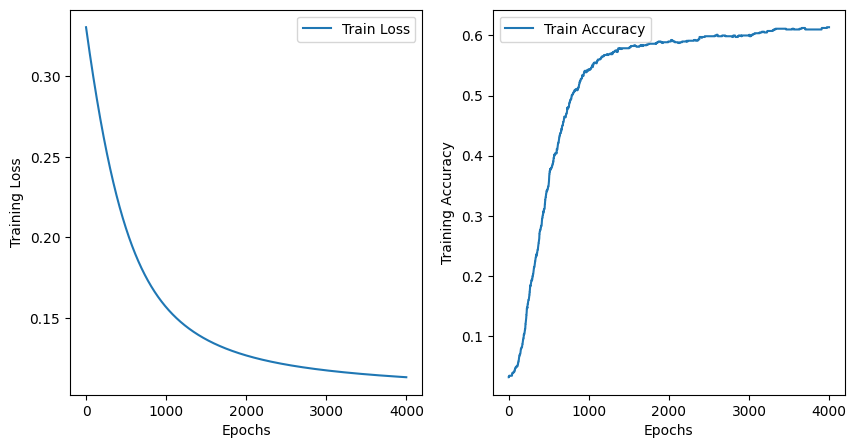

FOR VALIDATION SET:
Classification Report
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         3
           5       0.68      0.52      0.59        62
           6       0.55      0.84      0.66        81
           7       1.00      0.00      0.00        24
           8       1.00      0.00      0.00         1

    accuracy                           0.58       171
   macro avg       0.85      0.27      0.25       171
weighted avg       0.67      0.58      0.53       171



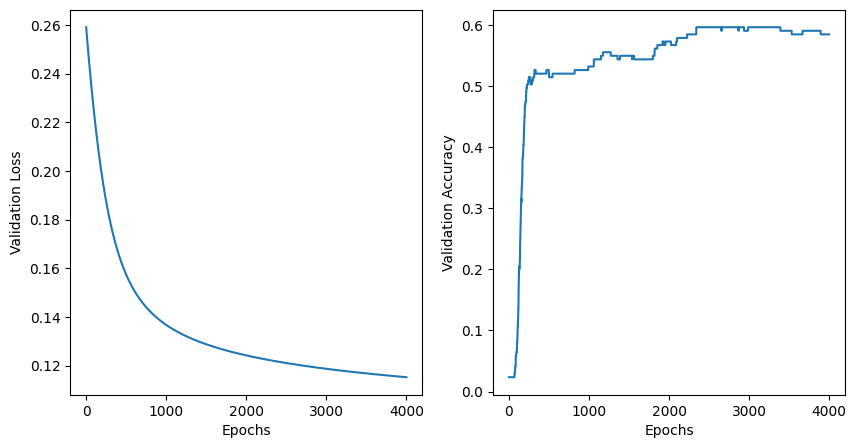

In [14]:
print("FOR TRAINING SET:")
print("Classification Report")
print(classification_report(y_train, y_pred, zero_division=1))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_losses)), train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(train_accuracies)), train_accuracies, label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()

plt.show()

print("FOR VALIDATION SET:")
print("Classification Report")
print(classification_report(y_val, y_pred_val, zero_division=1))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(validation_losses)), validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(len(validation_accuracies)), validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

Epoch 0: Loss=0.2840167756200848, Accuracy=0.08625
Epoch 100: Loss=0.25797605914145105, Accuracy=0.14625
Epoch 200: Loss=0.23528815866545832, Accuracy=0.27875
Epoch 300: Loss=0.21608026665937283, Accuracy=0.3925
Epoch 400: Loss=0.20036616429544513, Accuracy=0.49375
Epoch 500: Loss=0.18788276230715822, Accuracy=0.525
Epoch 600: Loss=0.17809557315546398, Accuracy=0.5275
Epoch 700: Loss=0.1703865270213883, Accuracy=0.51875
Epoch 800: Loss=0.16422022232588987, Accuracy=0.5125
Epoch 900: Loss=0.15919337813719966, Accuracy=0.51625
Epoch 1000: Loss=0.15501818840476314, Accuracy=0.52125
Epoch 1100: Loss=0.15149201120357111, Accuracy=0.5225
Epoch 1200: Loss=0.1484714427653817, Accuracy=0.5225
Epoch 1300: Loss=0.1458534904747665, Accuracy=0.5275
Epoch 1400: Loss=0.14356268111488257, Accuracy=0.53
Epoch 1500: Loss=0.14154243930459603, Accuracy=0.52625
Epoch 1600: Loss=0.13974936068580252, Accuracy=0.52625
Epoch 1700: Loss=0.1381493959864772, Accuracy=0.525
Epoch 1800: Loss=0.13671528404471453, Ac

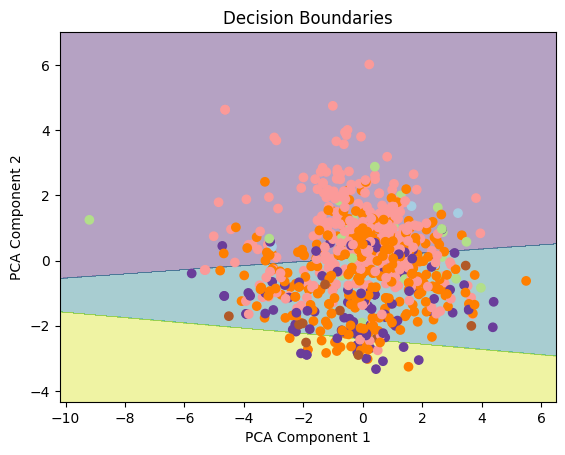

In [15]:
pca_model = MultinomialLogisticRegression(num_classes=9, learning_rate=0.005, num_epochs=4000)
pca_model.visualize_decision_boundary(X_train_pca, y_train)

Epoch 0: Loss=0.2446375780208767, Accuracy=0.0872093023255814
Epoch 100: Loss=0.214945957285831, Accuracy=0.2616279069767442
Epoch 200: Loss=0.19297773642023147, Accuracy=0.5174418604651163
Epoch 300: Loss=0.17730534942326506, Accuracy=0.5116279069767442
Epoch 400: Loss=0.16627060231386898, Accuracy=0.5116279069767442
Epoch 500: Loss=0.15845246291002987, Accuracy=0.5116279069767442
Epoch 600: Loss=0.15280858019364207, Accuracy=0.5116279069767442
Epoch 700: Loss=0.14863112516562926, Accuracy=0.5232558139534884
Epoch 800: Loss=0.14545406800099764, Accuracy=0.5290697674418605
Epoch 900: Loss=0.1429719012615235, Accuracy=0.5290697674418605
Epoch 1000: Loss=0.14098238189682002, Accuracy=0.5348837209302325
Epoch 1100: Loss=0.13934944246020659, Accuracy=0.5348837209302325
Epoch 1200: Loss=0.13797984980204633, Accuracy=0.5348837209302325
Epoch 1300: Loss=0.1368085450902985, Accuracy=0.5348837209302325
Epoch 1400: Loss=0.13578933416900268, Accuracy=0.5348837209302325
Epoch 1500: Loss=0.13488887

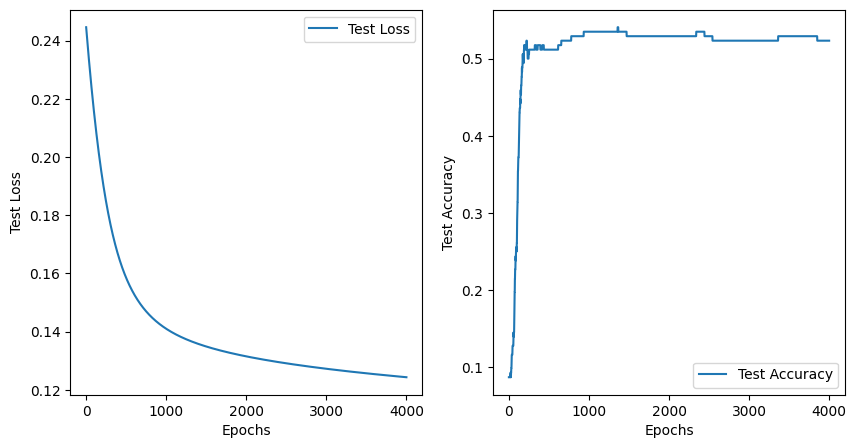

In [16]:
test_model = MultinomialLogisticRegression(num_classes=9, learning_rate=0.005, num_epochs=4000)
test_losses, test_accuracies = test_model.fit(X_test_normalized, y_test)
y_test_pred = model.predict(X_test_normalized)
print("FOR TESTING SET:")
print("Classification Report")
print(classification_report(y_test, y_test_pred, zero_division=1))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(test_losses)), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(test_accuracies)), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()

plt.show()

In [17]:
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]
num_epochs_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000]

# Create a loop to tune hyperparameters
for learning_rate in learning_rates:
    for num_epochs in num_epochs_list:
        # Create and train your model here with the current hyperparameters
        model = MultinomialLogisticRegression(num_classes=num_classes, learning_rate=learning_rate, num_epochs=num_epochs)
        losses, accuracies = model.fit(X_train_normalized, y_train)
        
        # Log metrics to W&B
        wandb.log({"learning_rate": learning_rate, "num_epochs": num_epochs, "validation_loss": losses[-1], "validation_accuracy": accuracies[-1]})

# Visualize hyperparameter tuning results using W&B parallel coordinates plot
wandb.finish()

Epoch 0: Loss=0.22012807382460195, Accuracy=0.3475


Epoch 100: Loss=0.21561073214126478, Accuracy=0.36875
Epoch 200: Loss=0.2113753504690688, Accuracy=0.375
Epoch 300: Loss=0.20740814962633894, Accuracy=0.3775
Epoch 400: Loss=0.20369505691669101, Accuracy=0.37375
Epoch 500: Loss=0.20022190457954386, Accuracy=0.37125
Epoch 600: Loss=0.19697460416069038, Accuracy=0.36625
Epoch 700: Loss=0.19393929522076317, Accuracy=0.3575
Epoch 800: Loss=0.1911024682268205, Accuracy=0.36
Epoch 900: Loss=0.18845106258385086, Accuracy=0.3575
Epoch 0: Loss=0.22676382257760366, Accuracy=0.145
Epoch 100: Loss=0.2214187859309149, Accuracy=0.175
Epoch 200: Loss=0.2163631116930482, Accuracy=0.20125
Epoch 300: Loss=0.21159063372551437, Accuracy=0.24875
Epoch 400: Loss=0.20709377880689311, Accuracy=0.31125
Epoch 500: Loss=0.20286375382676772, Accuracy=0.355
Epoch 600: Loss=0.1988907485360328, Accuracy=0.39375
Epoch 700: Loss=0.19516414465458967, Accuracy=0.43
Epoch 800: Loss=0.1916727229856226, Accuracy=0.4475
Epoch 900: Loss=0.18840486146351978, Accuracy=0.46125


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


learning_rate,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█████
num_epochs,▁▂▃▆▇▁▂▃▆▇▁▂▃▆▇▁▂▃▆▇▁▂▅▆▇▁▂▅▆▇▁▂▅▆▇▁▂▅▆█
validation_accuracy,▁▅▃▂▅▆▅▅█▆▂▄▇▄▆▅▅▆▇▇▄▆██▇▄▆█▆▇▅▇▆▇█▇▇▇▇█
validation_loss,█▆▆▄▄▇▄▄▃▂▅▃▃▃▂▄▃▂▂▂▄▃▂▂▂▄▃▂▂▁▃▂▂▂▁▃▂▂▁▁
learning_rate,0.008
num_epochs,7000
validation_accuracy,0.55625
validation_loss,0.12029
